# The Sparks Foundation - Data Science and Bussiness Analytics Internship

## Auther: Priyanka Shah

## Task 1: Prediction using Supervised Machine Learning Algorithm

#### Predict the percentage of the student based on the number of study hours and also predict the score if a student studies for 9.25 hr/day.

## Steps:

1. Importing Libraries read data
2. Visualizing the Dataset
3. Data Preparation
4. Train the algorithm
5. Making the prediction
6. Evoluation of the model

## Step 1: Importing Liabraries and read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read data from url

url="http://bit.ly/w-data"
dataset=pd.read_csv(url)
print("Data imported successfully")
dataset


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# to find out the number of rows and column fo dataset
dataset.shape

(25, 2)

In [4]:
#to find the infoemation about the dataset
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# to find is some value missing in the dataset or not
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 2: Visualizing the dataset

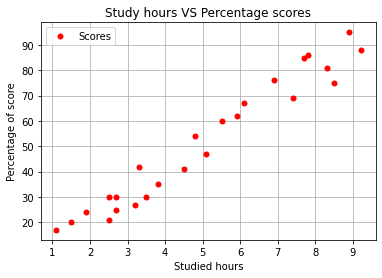

In [7]:
# Here we will plot the dataset and find the relation between the studied hours and percentage of scores.

dataset.plot(x='Hours',y='Scores',style='o',color='red',markersize=5)
plt.title('Study hours VS Percentage scores')
plt.xlabel('Studied hours')
plt.ylabel('Percentage of score')
plt.grid()
plt.show()

### In this graph we can clearly see the relation between the number of studied hours and the percentage of   score that as the studied hours increases the percentage of score also increases.

## Step 3: Data Preparation

In [8]:
# to divied data into attributes(inputs) and labels(outputs)
X=dataset.iloc[:, :-1].values
print('X[]=',X)
print('\n')
Y=dataset.iloc[:,1:].values
print('Y[] =',Y)

X[]= [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


Y[] = [[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


Now we have our attributes and label, After that we have to split our data into traning sets and test sets,for that we will do this by using scikit learn's build in function train_test_split():

In [9]:
#splittng values into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=0)

## Step 4: Train the algorithm

In [10]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,Y_train)

print('Training Completed')

Training Completed


### Visualizing data model

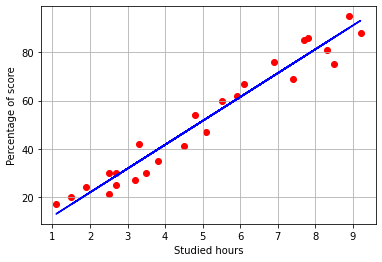

In [11]:
# plotting the regression line

line= regressor.coef_*X+regressor.intercept_

plt.scatter(X,Y,color='red')
plt.plot(X,line,color='blue')
plt.xlabel('Studied hours')
plt.ylabel('Percentage of score')
plt.grid()
plt.show()

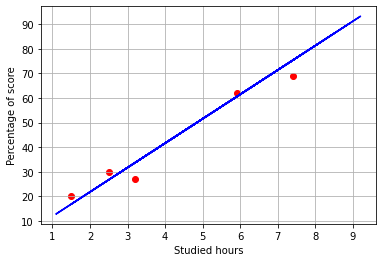

In [12]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X,line,color='blue')
plt.xlabel('Studied hours')
plt.ylabel('Percentage of score')
plt.grid()
plt.show()

## Step 5: Making the prediction

### Now we have traind our algorithm,so lets do some prediction

In [13]:
print(X_test) # Testing data of hours
Y_pred=regressor.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
print(Y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [15]:
print(Y_test)

[[20]
 [27]
 [69]
 [30]
 [62]]


In [16]:
# Comparing Actual and predicted data
df=pd.DataFrame({'Actual':[Y_test],'predidcted':[Y_pred]})
df

,Actual,predidcted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [17]:
### Now predict our own data as given

hours=9.25
own_pred= regressor.predict([[hours]])
#print(own_pred)
print('If a student studies for {} then the predicted score is {}'.format(hours,own_pred[0]))

If a student studies for 9.25 then the predicted score is [93.69173249]


## Step 6: Evaluating of the model

The last step is to evaluate the performance of the algorithm.
This step is perticular important to compare how well different algorithm perform on a perticular dataset.
So we choose mean square errror there are many much matrics.

In [18]:
from sklearn import metrics

mean_sq_err=metrics.mean_absolute_error(Y_test,Y_pred)
print('Mean Square Error :',mean_sq_err)

Mean Square Error : 4.183859899002975
